In [1]:
! pip install covidcast

     |████████████████████████████████| 12.3 MB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.9 MB 61.4 MB/s eta 0:00:0101
     |████████████████████████████████| 994 kB 71.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 67.3 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 79.1 MB/s eta 0:00:01
     |████████████████████████████████| 315 kB 68.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 70.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 74.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 16.5 MB/s eta 0:00:01


In [13]:
import covidcast
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = covidcast.signal("fb-survey", "smoothed_cli", date(2020, 5, 1), date(2021, 9, 23),
                        "county")

In [5]:
data = covidcast.signal("google-symptoms", "sum_anosmia_ageusia_smoothed_search", date(2020, 5, 1), date(2021, 9, 23), "state")

/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No google-symptoms sum_anosmia_ageusia_smoothed_search data found on 20210426 for geography 'state'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No google-symptoms sum_anosmia_ageusia_smoothed_search data found on 20210427 for geography 'state'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "


In [63]:

#mask wearing

data_mask = covidcast.signal("fb-survey", "smoothed_wearing_mask_7d",
                       date(2020, 5, 1), date(2021, 9, 23),
                        "county")

/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No fb-survey smoothed_wearing_mask_7d data found on 20200501 for geography 'county'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No fb-survey smoothed_wearing_mask_7d data found on 20200502 for geography 'county'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No fb-survey smoothed_wearing_mask_7d data found on 20200503 for geography 'county'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No fb-survey smoothed_wearing_mask_7d data found on 20200504 for geography 'county'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/conda/lib/python3.9/site-packages/covidcast/covidca

In [6]:
data.shape

(18468, 13)

In [20]:
data_sum = data.groupby('time_value').sum()
data_median = data.groupby('time_value').median()
data_std = data.groupby('time_value').std()


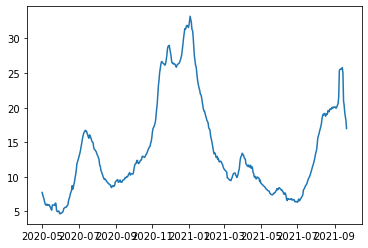

In [23]:
plt.plot(data_sum.index, data_sum.value)


Text(0.5, 1.0, 'Google Symptoms search counts')

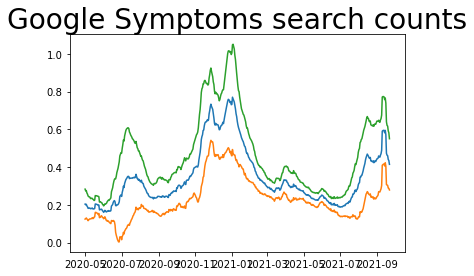

In [25]:
plt.plot(data_median.index, data_median.value)
plt.plot(data_median.index, data_median.value-data_std.value)
plt.plot(data_median.index, data_median.value+data_std.value)

plt.title('Google Symptoms search counts', fontsize=28)



In [39]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [62]:
data_median.index

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10',
               ...
               '2021-09-12', '2021-09-13', '2021-09-14', '2021-09-15',
               '2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19',
               '2021-09-20', '2021-09-21'],
              dtype='datetime64[ns]', name='time_value', length=506, freq=None)

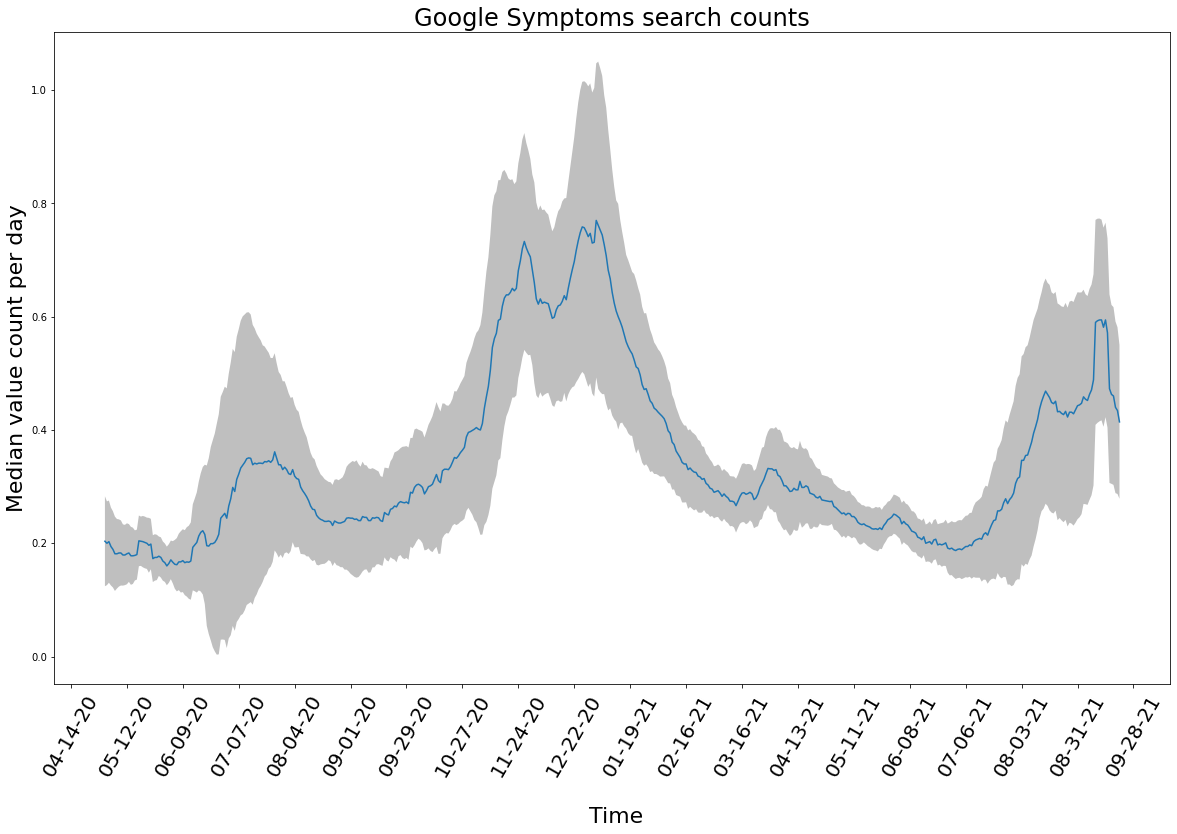

In [77]:
fig, ax = plt.subplots(figsize=(20, 12))


plt.plot(data_median.index, data_median.value)
# plt.plot(data_median.index, data_median.value-data_std.value)
# plt.plot(data_median.index, data_median.value+data_std.value)


plt.title('Google Symptoms search counts', fontsize=24)

plt.fill_between(data_median.index, data_median.value-data_std.value,data_median.value+data_std.value, facecolor='grey', alpha=0.5)
plt.xticks(rotation=60,fontsize=20)
plt.ylabel('Median value count per day', fontsize=22)
plt.xlabel('\n Time',fontsize=22)


# Define the date format
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))


In [72]:
data_mask_med = data_mask.groupby('time_value').median()
data_mask_std =data_mask.groupby('time_value').std()


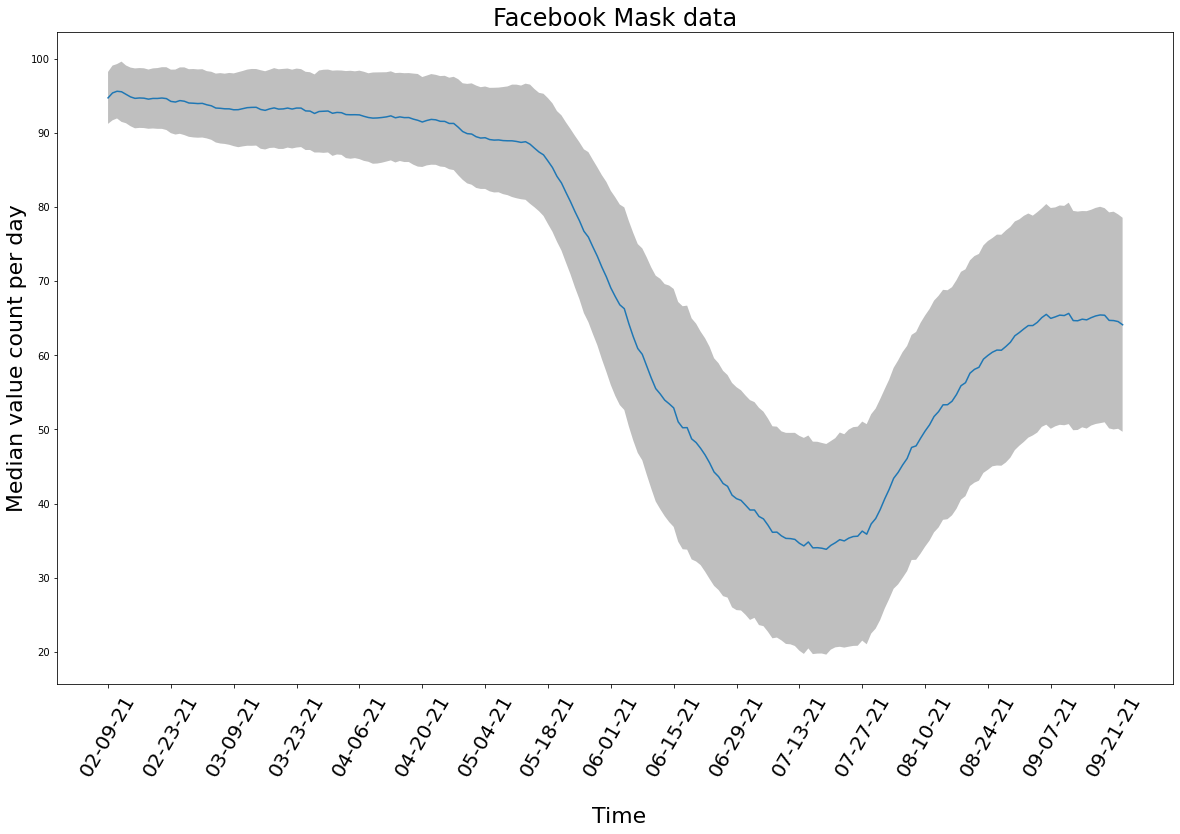

In [76]:
fig, ax = plt.subplots(figsize=(20, 12))


plt.plot(data_mask_med.index, data_mask_med.value)
# plt.plot(data_mask_med.index, data_mask_med.value-data_std.value)
# plt.plot(data_mask_med.index, data_mask_med.value+data_std.value)


plt.title('Facebook Mask data', fontsize=24)

plt.fill_between(data_mask_med.index, data_mask_med.value-data_mask_std.value,data_mask_med.value+data_mask_std.value, facecolor='grey', alpha=0.5)
plt.xticks(rotation=60,fontsize=20)
plt.ylabel('Median value count per day', fontsize=22)
plt.xlabel('\n Time',fontsize=22)


# Define the date format
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))


In [68]:
data_vacc = covidcast.signal("fb-survey", "smoothed_wcovid_vaccinated_or_accept",
                       date(2021, 1, 1), date(2021, 9, 23),
                        "county")

/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No fb-survey smoothed_wcovid_vaccinated_or_accept data found on 20200501 for geography 'county'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No fb-survey smoothed_wcovid_vaccinated_or_accept data found on 20200502 for geography 'county'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No fb-survey smoothed_wcovid_vaccinated_or_accept data found on 20200503 for geography 'county'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/conda/lib/python3.9/site-packages/covidcast/covidcast.py:423: NoDataWarning: No fb-survey smoothed_wcovid_vaccinated_or_accept data found on 20200504 for geography 'county'
  warnings.warn(f"No {data_source} {signal} data found on {day_str} "
/opt/con

In [71]:
data_vacc_group = data_vacc.groupby('time_value').median()

In [78]:
data_vacc_med = data_vacc.groupby('time_value').median()
data_vacc_std =data_vacc.groupby('time_value').std()


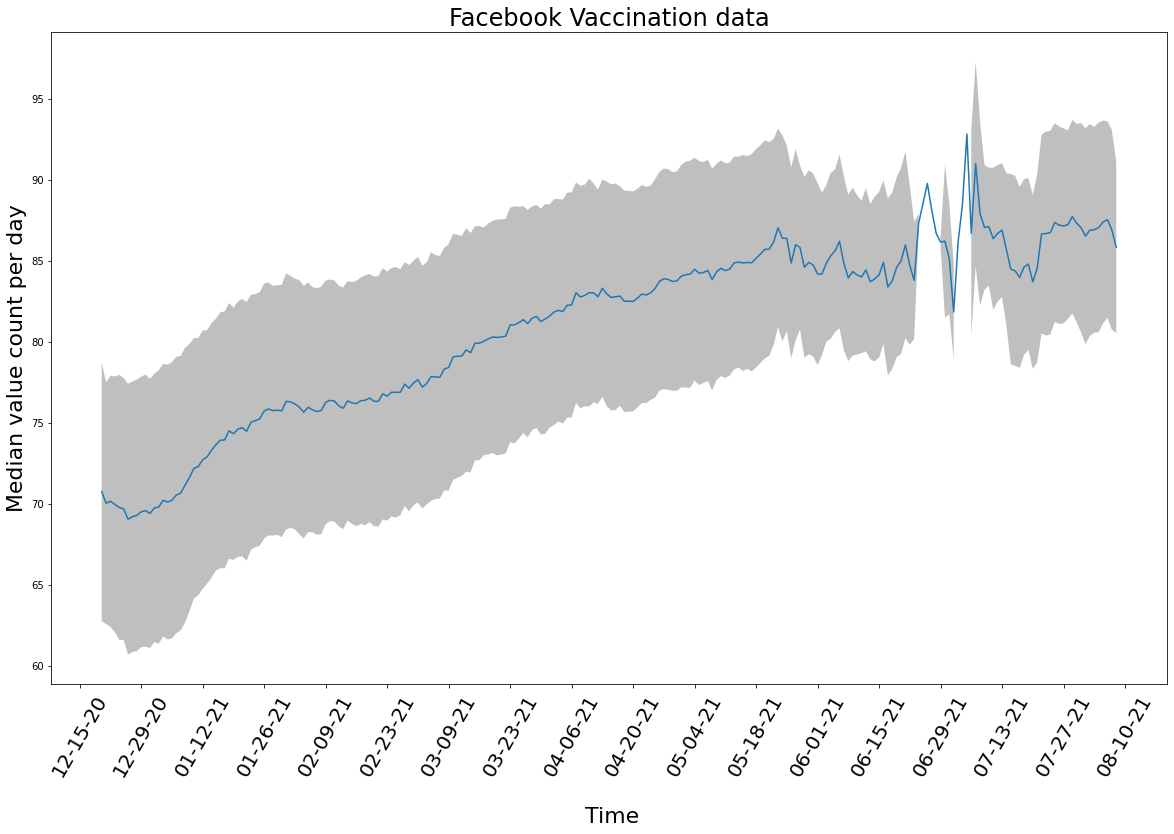

In [79]:
fig, ax = plt.subplots(figsize=(20, 12))


plt.plot(data_vacc_med.index, data_vacc_med.value)
# plt.plot(data_mask_med.index, data_mask_med.value-data_std.value)
# plt.plot(data_mask_med.index, data_mask_med.value+data_std.value)


plt.title('Facebook Vaccination data', fontsize=24)

plt.fill_between(data_vacc_med.index, data_vacc_med.value-data_vacc_std.value,data_vacc_med.value+data_vacc_std.value, facecolor='grey', alpha=0.5)
plt.xticks(rotation=60,fontsize=20)
plt.ylabel('Median value count per day', fontsize=22)
plt.xlabel('\n Time',fontsize=22)


# Define the date format
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))


In [ ]:
data

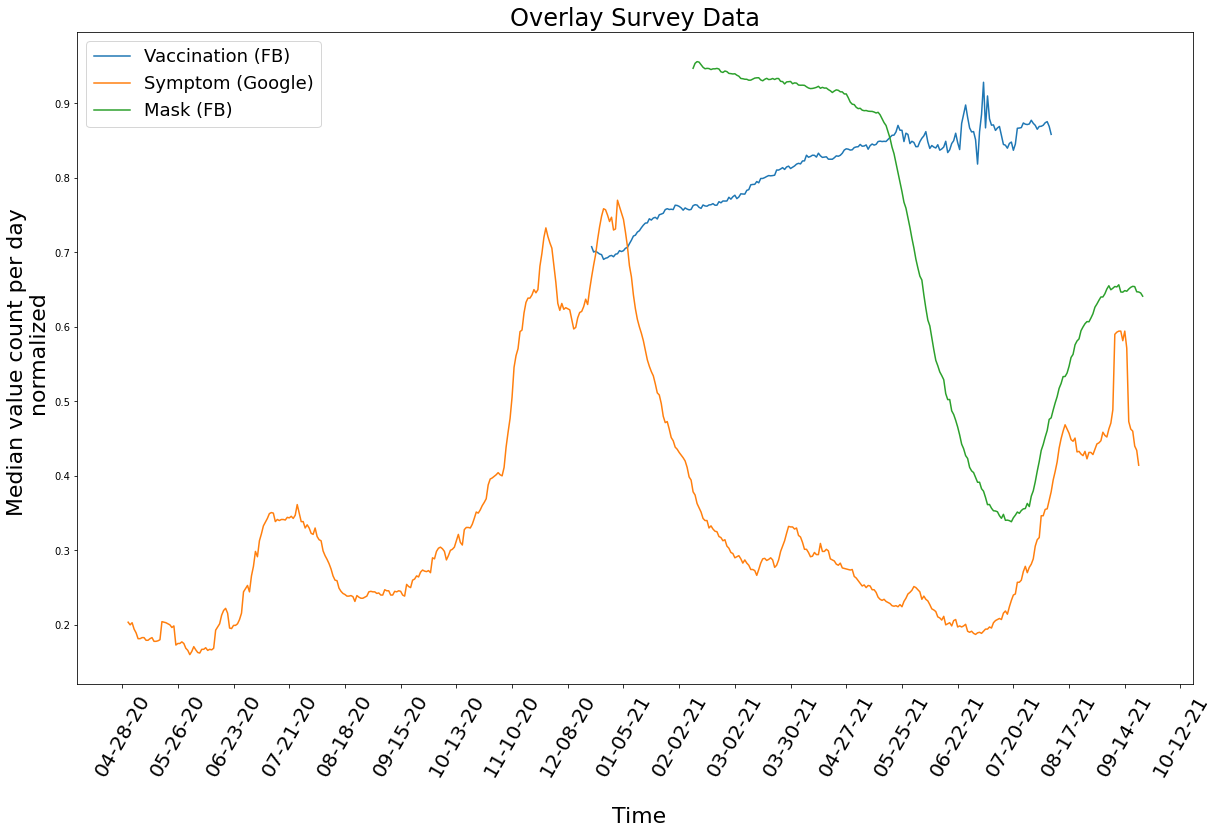

In [87]:
fig, ax = plt.subplots(figsize=(20, 12))


plt.plot(data_vacc_med.index, data_vacc_med.value/100, label='Vaccination (FB)')
plt.plot(data_median.index, data_median.value, label='Symptom (Google)')
plt.plot(data_mask_med.index, data_mask_med.value/100, label='Mask (FB)')
# plt.plot(data_mask_med.index, data_mask_med.value-data_std.value)
# plt.plot(data_mask_med.index, data_mask_med.value+data_std.value)


plt.title('Overlay Survey Data', fontsize=24)

# plt.fill_between(data_vacc_med.index, data_vacc_med.value-data_vacc_std.value,data_vacc_med.value+data_vacc_std.value, facecolor='grey', alpha=0.5)
plt.xticks(rotation=60,fontsize=20)
plt.ylabel('Median value count per day \n normalized', fontsize=22)
plt.xlabel('\n Time',fontsize=22)


# Define the date format
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)

plt.legend(fontsize=18)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))


### Safegraph data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
home_panel_summary = pd.read_csv("2020_06/home_panel_summary.csv")
home_panel_summary.head(2)

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime
0,2020,6,ak,US,21850002003,67,56
1,2020,6,ak,US,20200015002,38,34


In [ ]:
normalization_stats = pd.read_csv("2020_06/normalization_stats.csv")
normalization_stats.head(2)

,year,month,day,region,iso_country_code,total_visits,total_devices_seen,total_home_visits,total_home_visitors
0,2020,6,1,ALL,NaN,51943103,18867398,24442574,14878045
1,2020,6,1,ALL_CA,CA,697427,483462,697427,483462


In [ ]:
patterns_data_1 = pd.read_csv("2020_06/patterns-part1.csv.gz")

/Users/navjotkaur/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
patterns_data_1.head(2)

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,...,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,zzw-222@8fc-63c-m6k,NaN,Sunday's Metal Building Systems,18962 US Highway 84 E,Rusk,TX,75785,NaN,NaN,2020-06-01T00:00:00-05:00,...,{},{},NaN,13.5,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":1,""61-120"":...",{},"{""Sonic"":100,""Taco Bell"":100,""Ford Motor Compa...","[0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":1,""Wednesday"":1,""Thursda...","{""android"":0,""ios"":0}"
1,22g-222@5xc-jv6-xqz,NaN,Schmizza,628 NE Broadway St,Portland,OR,97232,SG_BRAND_19ca66f40f89366f,Schmizza,2020-06-01T00:00:00-07:00,...,"{""410510025013"":4,""410510013021"":4,""4105100250...","{""US"":40}",5664.0,8.5,"{""<5"":9,""5-10"":23,""11-20"":11,""21-60"":1,""61-120...","{""7-Eleven"":10,""McDonald's"":8,""Shell Oil"":8,""S...","{""Starbucks"":49,""Fred Meyer"":42,""Walmart"":40,""...","[0,0,0,0,0,0,0,2,4,6,9,10,11,12,4,6,5,7,0,7,3,...","{""Monday"":12,""Tuesday"":11,""Wednesday"":14,""Thur...","{""android"":30,""ios"":13}"


In [ ]:
pat = patterns_data_1[["postal_code", "placekey"]].dropna().drop_duplicates()
pat.postal_code = pat.postal_code.astype("int64")


covid = data[["geo_value"]].dropna().drop_duplicates()
covid.geo_value = covid.geo_value.astype("int")

pat.merge(covid, left_on="postal_code", right_on="geo_value")


,postal_code,placekey,geo_value
0,42101,223-222@5px-wxc-9pv,42101
1,42101,zzy-222@5px-wxj-st9,42101
2,42101,222-222@5px-xhz-7yv,42101
3,42101,229-222@5px-wxj-jvz,42101
4,42101,zzw-222@5px-wqy-d5f,42101
...,...,...,...
1490,6081,225-222@629-2bd-7qz,6081
1491,6081,zzy-222@629-2bc-jy9,6081
1492,12086,222-222@65y-z6z-y35,12086
1493,12086,zzy-223@65y-z6t-7bk,12086


In [ ]:
pat.postal_code.nunique()

31116

In [ ]:
patterns_data_1["region_l"] = [x.lower() for x in patterns_data_1.region]

In [ ]:
merged_data = patterns_data_1.merge(data, left_on="region_l", right_on="geo_value")
merged_data.head(2)

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,...,issue,lag,missing_value,missing_stderr,missing_sample_size,value,stderr,sample_size,geo_type,data_source
0,zzw-222@8fc-63c-m6k,NaN,Sunday's Metal Building Systems,18962 US Highway 84 E,Rusk,TX,75785,NaN,NaN,2020-06-01T00:00:00-05:00,...,2021-01-14,258,0,5,5,0.181429,None,None,state,google-symptoms
1,zzw-222@8fc-63c-m6k,NaN,Sunday's Metal Building Systems,18962 US Highway 84 E,Rusk,TX,75785,NaN,NaN,2020-06-01T00:00:00-05:00,...,2021-01-14,257,0,5,5,0.180000,None,None,state,google-symptoms


In [ ]:
merged_data.groupby("region").agg({"placekey": "nunique"})

,placekey
region,
AL,17646
AZ,20549
CA,121885
CO,20306
CT,11983
FL,71583
GA,35077
IA,12635
IL,41302


In [ ]:
state_data = merged_data[merged_data.region == "CA"]

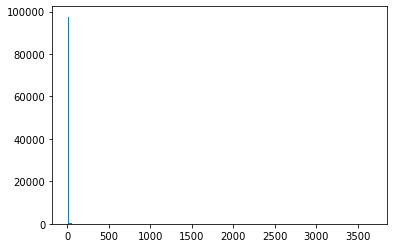

In [ ]:
plt.hist(pd.DataFrame(state_data.drop_duplicates()["location_name"].value_counts().reset_index()["location_name"]), bins=200)
plt.show()
         

In [ ]:
xdf = pd.DataFrame(state_data.drop_duplicates()["location_name"].value_counts()).reset_index()
xdf

,index,location_name
0,Subway,3668
1,Starbucks,3570
2,7-Eleven,3003
3,Chevron,2961
4,McDonald's,1974
...,...,...
98670,Freedom Lake Park,7
98671,Sayulitas Mexican Food,7
98672,Better Be,7
98673,Communion Church of God In Christ,7


In [ ]:
state_data[['brands', 'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day']].dropna().drop_duplicates()

,brands,raw_visit_counts,raw_visitor_counts,visits_by_day
730835,LOFT,6,6,"[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0..."
730849,Lovesac,86,70,"[1,2,3,5,4,2,0,1,5,2,4,1,4,2,3,3,3,1,2,6,2,3,3..."
730856,Finance of America Mortgage,22,3,"[1,0,0,1,1,2,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1..."
730863,Sears Home Services,133,23,"[8,7,8,9,7,0,0,5,4,2,7,8,0,0,8,6,6,10,5,0,0,4,..."
730912,Sam's Club,2184,1481,"[70,80,85,63,73,88,64,77,63,73,67,96,68,75,55,..."
...,...,...,...,...
1583743,Orangetheory Fitness,74,41,"[0,3,0,0,4,6,3,0,1,1,2,3,4,1,4,2,7,0,3,4,0,3,1..."
1583771,Luna Grill,40,32,"[0,0,0,0,0,2,0,0,2,1,0,0,1,0,1,0,2,1,0,4,1,3,7..."
1583806,Hanesbrands,86,73,"[1,0,0,0,0,0,0,0,1,0,1,3,2,1,1,4,5,3,5,15,3,1,..."
1583848,Jack in the Box,312,259,"[16,12,13,8,16,11,6,8,9,12,9,12,13,7,10,11,6,1..."


In [ ]:
state_data[['date_range_start', 'date_range_end']].drop_duplicates()

,date_range_start,date_range_end
0,2020-06-01T00:00:00-05:00,2020-07-01T00:00:00-05:00
280,2020-06-01T00:00:00-06:00,2020-07-01T00:00:00-06:00


In [ ]:
state_data.columns

Index(['placekey', 'parent_placekey', 'location_name', 'street_address',
       'city', 'region', 'postal_code', 'safegraph_brand_ids', 'brands',
       'date_range_start', 'date_range_end', 'raw_visit_counts',
       'raw_visitor_counts', 'visits_by_day', 'poi_cbg', 'visitor_home_cbgs',
       'visitor_home_aggregation', 'visitor_daytime_cbgs',
       'visitor_country_of_origin', 'distance_from_home', 'median_dwell',
       'bucketed_dwell_times', 'related_same_day_brand',
       'related_same_month_brand', 'popularity_by_hour', 'popularity_by_day',
       'device_type', 'region_l', 'geo_value', 'signal', 'time_value', 'issue',
       'lag', 'missing_value', 'missing_stderr', 'missing_sample_size',
       'value', 'stderr', 'sample_size', 'geo_type', 'data_source'],
      dtype='object')

In [ ]:
state_data.brands.value_counts()[:20]

Subway                                 3668
Starbucks                              3570
7-Eleven                               3003
Chevron                                2961
McDonald's                             1974
Shell Oil                              1883
United States Postal Service (USPS)    1876
ARCO                                   1806
Jack in the Box                        1645
CVS                                    1498
76                                     1414
Taco Bell                              1386
ampm                                   1365
Farmers Insurance Group                1197
Chevron Extra Mile                     1190
Dollar Tree                            1113
Carl's Jr.                             1092
AutoZone                               1015
Chase                                   917
O'Reilly Auto Parts                     910
Name: brands, dtype: int64

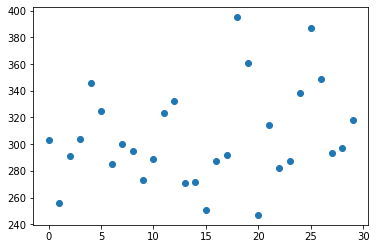

In [ ]:
xdf = state_data[(state_data.brands == "Pizza Hut")
                ][["visits_by_day", "raw_visit_counts", "city"]].drop_duplicates().sort_values(
    "raw_visit_counts", ascending=False)

state_visits_by_day = []
for x in xdf.visits_by_day.tolist():
    cur_lst = [int(y) for y in x[1:-1].split(',')]
    if len(state_visits_by_day) == 0:
        state_visits_by_day = [cur_lst[i] for i in range(len(cur_lst))]
    else:
        state_visits_by_day = [(state_visits_by_day[i] + cur_lst[i]) for i in range(len(cur_lst))]

plt.scatter(np.arange(len(state_visits_by_day)), state_visits_by_day)
plt.show()
    

### Do you want to go through just brands?

In [ ]:
xdf.head(20)

,index,location_name
0,Valero Energy,3626
1,Subway,2891
2,Dollar General,2702
3,Exxon Mobil,2660
4,Shell Oil,2646
5,United States Postal Service (USPS),2527
6,Family Dollar Stores,1848
7,Chevron,1806
8,McDonald's,1764
9,Metro by T Mobile Authorized Dealer,1722


In [ ]:
f(public_feature, county/brand):